#Simulação do sistema novo
 Neste modelo, estamos simulando a previsão do resultado do modelo de reclassificação, usando cadeia de Markov. A cadeia de Markov é uma ferramenta estatística que nos permite prever eventos futuros com base em estados atuais e probabilidades de transição. O problema consiste em prever o estado (Correto ou Incorreto) em um determinado número de compras, usando uma matriz de transição de estados.


## Importação das bibliotecas necessárias


In [1]:
import numpy as np
import random as rm
import matplotlib.pyplot as plt

###Nessa etapa, foram adicionados os dois estados, Correto e Incorreto, e também as sequências de possíveis eventos, e no final a matriz de probabilidade no código

In [2]:
# Os estados
states = ["Correto", "Incorreto"]

# Sequências possíveis de eventos
transitionName = [["CC", "CI"], ["IC", "II"]]

# Matriz de probabilidades (matriz de transição)
transitionMatrix = [[0.85, 0.15], [0.15, 0.85]]

##Lógica de simulação

No código a seguir, é definida uma função chamada "forecast" que implementa um modelo de Markov para prever o estado. A função recebe um argumento, "purchase", que representa o número de dias a serem previstos.

E no final é possível escolher a quantidade de compras que se deseja simular

Estado inicial: Correto
Possíveis estados: ['Correto', 'Correto', 'Correto', 'Correto', 'Correto', 'Incorreto', 'Incorreto', 'Incorreto', 'Incorreto', 'Incorreto', 'Correto', 'Correto', 'Correto', 'Correto', 'Correto', 'Correto', 'Correto', 'Correto', 'Correto', 'Correto', 'Correto', 'Correto', 'Correto', 'Correto', 'Correto', 'Correto', 'Correto', 'Correto', 'Correto', 'Correto', 'Correto', 'Incorreto', 'Incorreto', 'Incorreto', 'Incorreto', 'Correto', 'Correto', 'Correto', 'Incorreto', 'Incorreto', 'Incorreto', 'Correto', 'Correto', 'Correto', 'Incorreto', 'Incorreto', 'Correto', 'Correto', 'Correto', 'Correto', 'Correto', 'Correto', 'Correto', 'Incorreto', 'Incorreto', 'Incorreto', 'Incorreto', 'Incorreto', 'Incorreto', 'Correto', 'Correto', 'Correto', 'Correto', 'Correto', 'Incorreto', 'Correto', 'Correto', 'Incorreto', 'Correto', 'Correto', 'Correto', 'Correto', 'Correto', 'Incorreto', 'Incorreto', 'Incorreto', 'Incorreto', 'Incorreto', 'Incorreto', 'Correto', 'Correto', 'Correto'

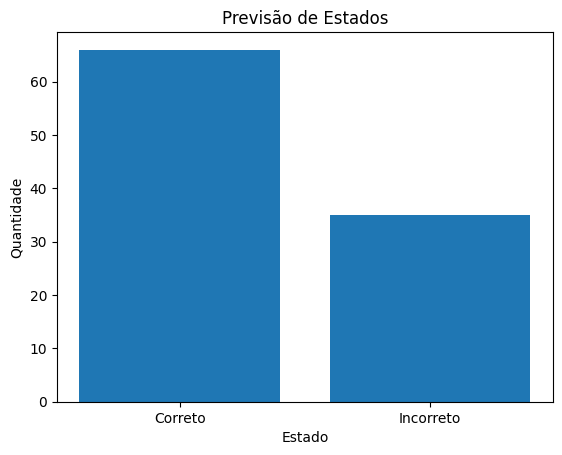

In [18]:
# Função que implementa o modelo de Markov para prever o estado
def forecast(purchase):
    # Escolha o estado inicial
    currentStatus = "Correto"
    print("Estado inicial: " + currentStatus)

    # Armazene a sequência de estados
    statusSequence = [currentStatus]
    prob_sequence = []

    i = 0
    prob = 1

    while i != purchase:
        if currentStatus == "Correto":
            change = np.random.choice(transitionName[0], replace=True, p=transitionMatrix[0])
            if change == "CC":
                prob = prob * 0.85
                statusSequence.append("Correto")
            else:
                prob = prob * 0.15
                currentStatus = "Incorreto"
                statusSequence.append("Incorreto")
        elif currentStatus == "Incorreto":
            change = np.random.choice(transitionName[1], replace=True, p=transitionMatrix[1])
            if change == "II":
                prob = prob * 0.15
                statusSequence.append("Incorreto")
            else:
                prob = prob * 0.85
                currentStatus = "Correto"
                statusSequence.append("Correto")

        prob_sequence.append(prob)
        i += 1

    print("Possíveis estados: " + str(statusSequence))
    print("Probabilidade da sequência de estados: " + str(prob))

    return statusSequence, prob_sequence

# Função para prever o estado possível nas próximas compras
sequencia_estados, probabilidades = forecast(100)

# Armazene contagens de estados "Correto" e "Incorreto"
correto_count = sequencia_estados.count("Correto")
incorreto_count = sequencia_estados.count("Incorreto")

# Crie um gráfico de barras
estados = ["Correto", "Incorreto"]
quantidades = [correto_count, incorreto_count]

plt.bar(estados, quantidades)
plt.xlabel("Estado")
plt.ylabel("Quantidade")
plt.title("Previsão de Estados")
plt.show()